In [49]:
import torch
from d2l import torch as d2l
from torch import nn


In [ ]:
!pip install matplotlib==3.0#d2l包的matplotlib比较老

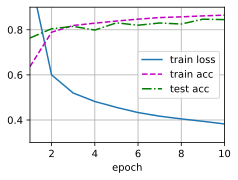

In [39]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


一个非常大的梯度流过一个 ReLU 神经元，更新过参数之后，这个神经元再也不会对任何数据有激活现象了。
如果这个情况发生了，那么这个神经元的梯度就永远都会是0.

实际操作中，如果你的learning rate 很大，那么很有可能你网络中的40%的神经元都”dead”了。
当然，如果你设置了一个合适的较小的learning rate，这个问题发生的情况其实也不会太频繁。

LeakyReLU(x)=max(0,x)+negative_slope∗min(0,x)

LeakyReLU即修正了数据分布，又保留了一些负轴的值，使得负轴信息不会全部丢失。
​

$LeakyRELU(x)=\begin{cases}
x; \text{ if } x \geq 0 \\
\text{negative\_slope} \times x; \text{ otherwise }
\end{cases}$

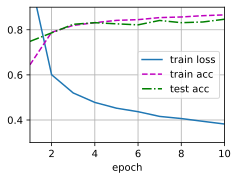

In [41]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.LeakyReLU(0.05), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


Randomized ReLU：

RReLU(x)=$\begin{cases}
x; \text{ if } x \geq 0 \\
\text{a}x; \text{ otherwise }
\end{cases}$

where aa is randomly sampled from uniform distribution $\mathcal{U}(\text{lower}, \text{upper})U(lower,upper).$

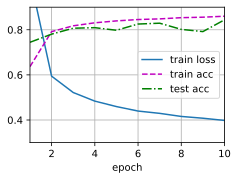

In [51]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.RReLU(), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
